In [10]:
from machinelearning.mlpipeline import MLPipelines
from machinelearning.featexpl import FeaturesExplanation

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import optuna
import pandas as pd
# from sklearn.preprocessing import LabelEncoder ###
# from sklearn.cross_decomposition import PLSRegression

# model = LogisticRegression()
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1],
#     'penalty': ['l1', 'l2']
# }
csv_dir = 'data/composite_dataset.csv'
label = 'group'

model = LogisticRegression()
# model = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [10, 20, 50],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

%load_ext autoreload
%autoreload 2

# mlpipe = MLPipelines(estimator=model, param_grid=param_grid, label=label, csv_dir=csv_dir)
# mlpipe.normalize()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# dataloader
mlpipe = MLPipelines(label=label, csv_dir=csv_dir, estimator=model)
# mlpipe._encode_labels()
mlpipe.normalize()
mlpipe.feature_selection(method='mrmr', n_features=10, inner_method='chi2')

Label mapping: {0: 'Factor1:CASE', 1: 'Factor1:CONTROL'}


100%|██████████| 10/10 [00:00<00:00, 19.82it/s]


In [48]:
# scores, params = mlpipe.nested_cross_validation(n_trials=5,optimizer='bayesian_search')

Performing nested cross-validation for LogisticRegression...


  0%|          | 0/10 [00:00<?, ?it/s][I 2024-02-02 22:16:02,791] A new study created in memory with name: no-name-7b40a7dd-67fb-40a0-b917-0005379fe67c


[W 2024-02-02 22:16:02,837] Trial 4 failed with parameters: {'penalty': 'l1', 'C': 1.0064518534058153, 'solver': 'newton-cholesky', 'max_iter': 569} because of the following error: The value nan is not acceptable.
[I 2024-02-02 22:16:02,842] Trial 1 finished with value: 1.0 and parameters: {'penalty': 'l2', 'C': 1.9461206361713579, 'solver': 'sag', 'max_iter': 584}. Best is trial 1 with value: 1.0.
[I 2024-02-02 22:16:02,848] Trial 0 finished with value: 0.9350254952998044 and parameters: {'penalty': 'l1', 'C': 9.2259027520923, 'solver': 'saga', 'max_iter': 480}. Best is trial 1 with value: 1.0.
[W 2024-02-02 22:16:02,850] Trial 4 failed with value nan.
[I 2024-02-02 22:16:02,880] Trial 2 finished with value: 0.905371624679811 and parameters: {'penalty': None, 'C': 8.365138000695936, 'solver': 'newton-cholesky', 'max_iter': 215}. Best is trial 1 with value: 1.0.
[I 2024-02-02 22:16:02,884] Trial 3 finished with value: 1.0 and parameters: {'penalty': None, 'C': 2.30466945804202, 'solver

In [28]:
# mlpipe.bayesian_search()
# xg = [GradientBoostingClassifier(), LinearDiscriminantAnalysis(),  GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC(),XGBClassifier()]
# xg = [LinearDiscriminantAnalysis(), XGBClassifier(), GradientBoostingClassifier(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]

  0%|          | 0/3 [00:00<?, ?it/s]

Performing nested cross-validation for RandomForestClassifier...


[I 2024-02-02 22:36:17,137] A new study created in memory with name: no-name-0e8472bc-489d-4129-8769-d7ef46195fbf
[I 2024-02-02 22:36:19,246] Trial 7 finished with value: 0.7197421865436366 and parameters: {'n_estimators': 37, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 8, 'bootstrap': False}. Best is trial 7 with value: 0.7197421865436366.
[I 2024-02-02 22:36:20,625] Trial 4 finished with value: 0.7197421865436366 and parameters: {'n_estimators': 67, 'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 9, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 7 with value: 0.7197421865436366.
[I 2024-02-02 22:36:21,623] Trial 6 finished with value: 0.7197421865436366 and parameters: {'n_estimators': 117, 'criterion': 'gini', 'max_depth': 41, 'min_samples_leaf': 8, 'min_samples_split': 7, 'bootstrap': True}. Best is trial 7 with value: 0.7197421865436366.
[I 2024-02-02 22:36:21,658] Trial 5 finished with value: 0.7197421865436366 and 

Performing nested cross-validation for LinearDiscriminantAnalysis...


[I 2024-02-02 22:37:03,405] A new study created in memory with name: no-name-b9b6e18f-2f4b-4b30-950e-c8cbb19cc9ec
[I 2024-02-02 22:37:03,554] Trial 1 finished with value: 0.9663110499836631 and parameters: {'solver': 'lsqr', 'shrinkage': 0.07058255925874812, 'tol': 0.0001, 'store_covariance': False}. Best is trial 1 with value: 0.9663110499836631.
[I 2024-02-02 22:37:03,583] Trial 5 finished with value: 1.0 and parameters: {'solver': 'eigen', 'shrinkage': 0.31588946562690334, 'tol': 0.001, 'store_covariance': False}. Best is trial 5 with value: 1.0.
[I 2024-02-02 22:37:03,605] Trial 8 finished with value: 1.0 and parameters: {'solver': 'lsqr', 'shrinkage': 0.7929224519762827, 'tol': 0.001, 'store_covariance': True}. Best is trial 5 with value: 1.0.
[I 2024-02-02 22:37:03,611] Trial 4 finished with value: 1.0 and parameters: {'solver': 'eigen', 'shrinkage': 0.3666202465587435, 'tol': 1e-05, 'store_covariance': False}. Best is trial 5 with value: 1.0.
[I 2024-02-02 22:37:03,628] Trial 3 

Performing nested cross-validation for LogisticRegression...


[I 2024-02-02 22:37:06,609] A new study created in memory with name: no-name-007a4837-f085-45ed-a32a-6b5590e5dfcf
[I 2024-02-02 22:37:06,647] Trial 2 finished with value: 1.0 and parameters: {'penalty': 'l2', 'C': 3.6335829384508798, 'solver': 'sag', 'max_iter': 744}. Best is trial 2 with value: 1.0.
[W 2024-02-02 22:37:06,671] Trial 7 failed with parameters: {'penalty': 'l1', 'C': 2.59117902971785, 'solver': 'lbfgs', 'max_iter': 498} because of the following error: The value nan is not acceptable.
[W 2024-02-02 22:37:06,715] Trial 7 failed with value nan.
[I 2024-02-02 22:37:06,728] Trial 1 finished with value: 1.0 and parameters: {'penalty': None, 'C': 4.984380684752182, 'solver': 'saga', 'max_iter': 632}. Best is trial 2 with value: 1.0.
[I 2024-02-02 22:37:06,760] Trial 0 finished with value: 1.0 and parameters: {'penalty': 'l2', 'C': 7.535975051354723, 'solver': 'liblinear', 'max_iter': 155}. Best is trial 2 with value: 1.0.
[I 2024-02-02 22:37:06,809] Trial 6 finished with value:

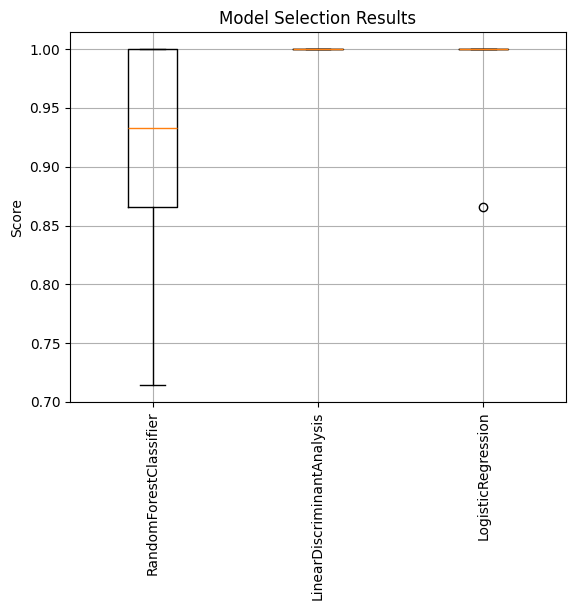

[I 2024-02-02 22:37:09,734] A new study created in memory with name: no-name-917bf4e3-7bfc-4181-a081-28a1b3efa4f9
[I 2024-02-02 22:37:09,750] Trial 0 finished with value: 1.0 and parameters: {'solver': 'svd', 'store_covariance': False, 'tol': 1e-05}. Best is trial 0 with value: 1.0.
[I 2024-02-02 22:37:09,766] Trial 1 finished with value: 1.0 and parameters: {'solver': 'eigen', 'shrinkage': 0.6360024361488561, 'tol': 0.001}. Best is trial 0 with value: 1.0.
[I 2024-02-02 22:37:09,780] Trial 2 finished with value: 1.0 and parameters: {'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}. Best is trial 0 with value: 1.0.
[I 2024-02-02 22:37:09,798] Trial 3 finished with value: 1.0 and parameters: {'solver': 'eigen', 'shrinkage': 0.41471825348459745, 'tol': 0.0001}. Best is trial 0 with value: 1.0.
[I 2024-02-02 22:37:09,812] Trial 4 finished with value: 1.0 and parameters: {'solver': 'svd', 'store_covariance': False, 'tol': 0.001}. Best is trial 0 with value: 1.0.
[I 2024-02-02 22:

For the LinearDiscriminantAnalysis model: 
Best parameters: {'solver': 'svd', 'store_covariance': False, 'tol': 1e-05}
Best matthews_corrcoef: 1.0


In [51]:
fitted_mod ,df= mlpipe.model_selection(optimizer='bayesian_search',n_trials=10,num_trials=2,score='matthews_corrcoef',n_iter=2, train_best='bayesian_search',return_model=True,plot='box',scores_df=True,search_on=[LogisticRegression(),LinearDiscriminantAnalysis(),RandomForestClassifier()])#, exclude=[XGBClassifier()],result=True)

In [52]:
df

,Estimator,Scores,Mean,Max,Std,Median,Evaluated,Best_Params
0,RandomForestClassifier,"[1.0, 1.0, 0.8660254037844387, 0.8660254037844...",0.917839,1.0,0.092696,0.933013,0.825143,"[{'n_estimators': 145, 'criterion': 'gini', 'm..."
1,LinearDiscriminantAnalysis,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,1.0,0.000000,1.000000,1.000000,"[{'solver': 'eigen', 'shrinkage': 0.3158894656..."
2,LogisticRegression,"[1.0, 1.0, 1.0, 1.0, 0.8660254037844387, 1.0, ...",0.986603,1.0,0.040192,1.000000,0.946410,"[{'penalty': 'l2', 'C': 3.6335829384508798, 's..."


In [4]:
# import pickle
# filename = 'fitted_10.sav'
# # # pickle.dump(fitted_mod, open(filename, 'wb'))
# fitted_mod = pickle.load(open(filename, 'rb'))

# dataloader
mlpipe = MLPipelines(estimator=model, param_grid={}, label=label, csv_dir=csv_dir)
# mlpipe._encode_labels()
mlpipe.normalize()
mlpipe.feature_selection(method='mrmr', n_features=100, inner_method='chi2')


Label mapping: {0: 'Factor1:CASE', 1: 'Factor1:CONTROL'}


100%|██████████| 100/100 [00:05<00:00, 17.70it/s]


In [37]:
# fitted_mod = XGBClassifier(booster='gbtree').fit(mlpipe.X, mlpipe.y)
fitted_mod = RandomForestClassifier().fit(mlpipe.X, mlpipe.y)
# fitted_mod = LogisticRegression().fit(mlpipe.X, mlpipe.y)
# fitted_mod = DecisionTreeClassifier().fit(mlpipe.X, mlpipe.y)
# fitted_mod = GradientBoostingClassifier().fit(mlpipe.X, mlpipe.y)
# fitted_mod = LinearDiscriminantAnalysis().fit(mlpipe.X, mlpipe.y)
# fitted_mod = GaussianNB().fit(mlpipe.X, mlpipe.y)

In [26]:
fesel = FeaturesExplanation(best_estimator=fitted_mod, X=mlpipe.X, y=mlpipe.y, label_mapping=mlpipe.label_mapping)
fesel.calculate_shap_values(explainer_type='general')

In [27]:
fesel.shap_values.shape

(71, 100, 2)

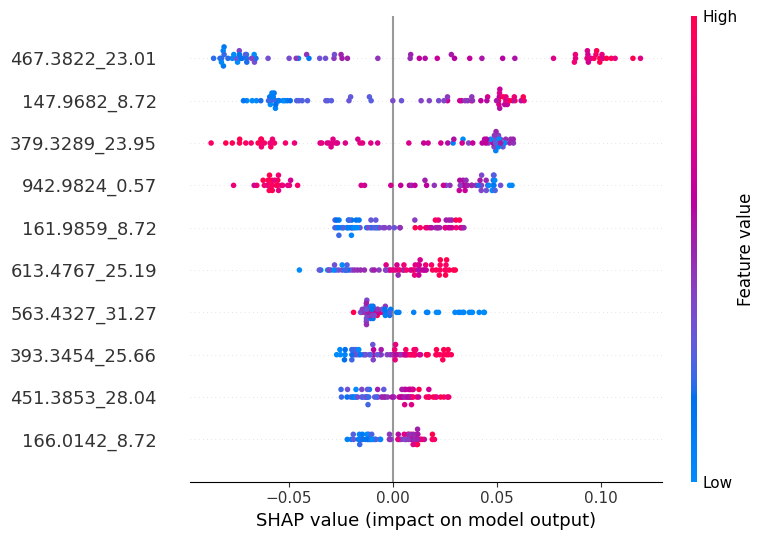

The plot is for label 1, corresponding to Factor1:CONTROL


In [28]:
fesel.plot_shap_values(plot_type='summary',label=0)

In [62]:
import shap

**χερατα**

In [11]:
from dash import Dash, dcc, html, Input, Output
# from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
import plotly.express as px
# import pandas as pd

app = Dash(__name__)

app.layout = html.Div([
    html.H4("Visualization of PCA's explained variance"),
    dcc.Graph(id="graph"),
    html.P("Number of components:"),
    dcc.Slider(
        id='slider',
        min=2, max=5, value=3, step=1)
])

@app.callback(
    Output("graph", "figure"), 
    Input("slider", "value"))
def run_and_plot(n_components):
    try:
        pca = PCA(n_components=n_components)
        components = pca.fit_transform(fesel.X)

        var = pca.explained_variance_ratio_.sum() * 100
        labels = {i: f'PC{i+1}' for i in range(n_components)}

        fig = px.scatter_matrix(
            components,
            color=fesel.y,
            dimensions=range(n_components),
            labels=labels,
            title=f'Total Explained Variance: {var:.2f}%')
        fig.update_traces(diagonal_visible=False)
        return fig
    except Exception as e:
        return px.scatter_matrix(title=f'An error occurred: {e}')

app.run_server(debug=True)

In [ ]:
fesel.shap_values.values.shape

(71, 10, 2)